# Namakan and Rainy Lake Water Levels 1970-2014

[Rainy Lake](http://en.wikipedia.org/wiki/Rainy_Lake) is a relatively large lake on Minnesota/Ontario border that makes a portion of [Voyageurs National Park](http://en.wikipedia.org/wiki/Voyageurs_National_Park). In recent years Rainy Lake has experienced periods of high water levels and flooding. The purpose of these notes and calculations here is to quantify those episodes using publically available data sets, explore possible reasons for these events, and what can be done to reduce the risk of future high water and flooding events.

### Initialization

Initilization of the graphics system and computational modules used in this IPython notebook.

In [16]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

# Data directory
dir = '../data/'
img = '../images/'

## Namakan Lake and Rainy Lake Levels

<IPython.core.display.Javascript object>


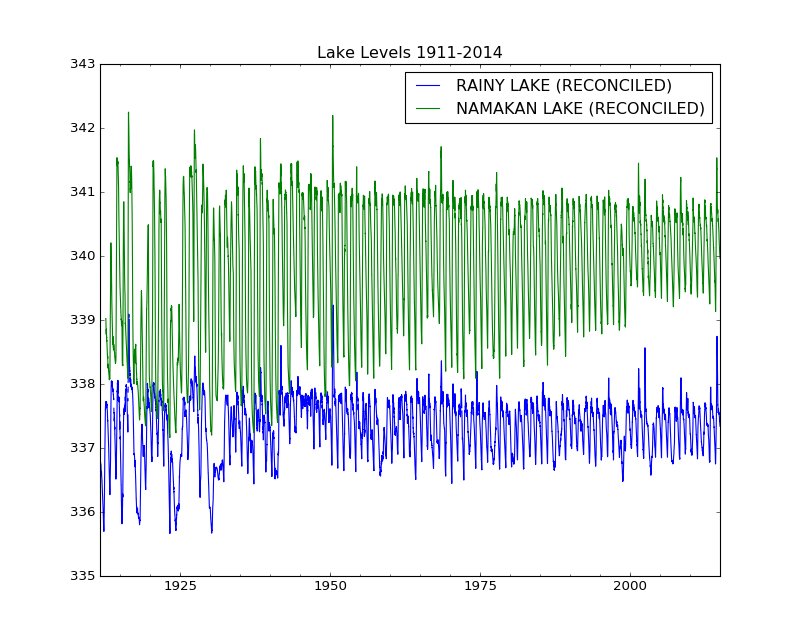

In [22]:
RL = pd.read_pickle(dir+'RL.pkl')
NL = pd.read_pickle(dir+'NL.pkl')
plt.figure(figsize=(10,8))
plt.hold(True)
RL.plot()
NL.plot()
plt.hold(False)
plt.legend([RL.name,NL.name]);
plt.title('Lake Levels' + ' ' 
         + str(RL.dropna().index[0].year) + '-' + str(RL.dropna().index[-1].year))

fname = img + 'RainyNamakanLakeLevels.png'

plt.savefig(fname)
!convert $fname -trim $fname
!convert $fname -transparent white $fname

## Rule Curve Performance 1970-1999

Load the rule curves from another notebook.

<IPython.core.display.Javascript object>


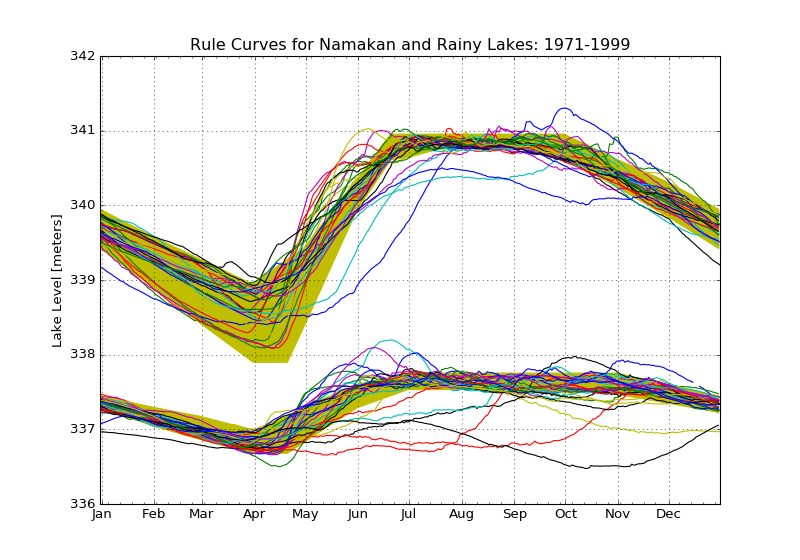

In [23]:
NL1970 = pd.read_pickle(dir+'NL1970.pkl')
RL1970 = pd.read_pickle(dir+'RL1970.pkl')

plt.figure(figsize=(10,7))
plt.hold(True)
NL1970['LRC'].plot(color='y')
NL1970['URC'].plot(color='y')

RL1970['LRC'].plot(color='y')
RL1970['URC'].plot(color='y')

plt.fill_between(NL1970.index,
                 NL1970['LRC'].tolist(),
                 NL1970['URC'].tolist(),
                 color='y', alpha='1')

plt.fill_between(RL1970.index,
                 RL1970['LRC'].tolist(),
                 RL1970['URC'].tolist(),
                 color='y', alpha='1')

plt.ylabel('Lake Level [meters]')
plt.title('Rule Curves for Namakan and Rainy Lakes: 1971-1999')


e = pd.Series([])

for (yr,r) in RL['1971':'1999'].groupby(RL['1971':'1999'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    e = e.append((r - RL1970['URC']).tshift(-shift.days))

for (yr,r) in NL['1971':'1999'].groupby(NL['1971':'1999'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r.tshift(shift.days).plot()
    
plt.grid()
    
plt.hold(False)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fname = img + 'RuleCurvePerformance1970-1999.png'

plt.savefig(fname)
!convert $fname -trim $fname

<IPython.core.display.Javascript object>


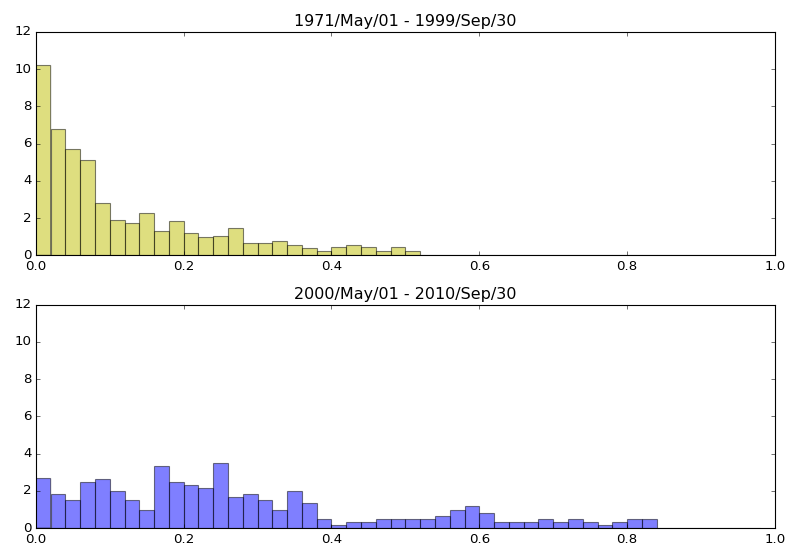

In [5]:
plt.figure(figsize=(10,7))
plt.hold(True)
NL2000['LRC'].plot(color='b')
NL2000['URC'].plot(color='b')

RL2000['LRC'].plot(color='b')
RL2000['URC'].plot(color='b')

plt.fill_between(NL2000.index,
                 NL2000['LRC'].tolist(),
                 NL2000['URC'].tolist(),
                 color='b', alpha='1')

plt.fill_between(RL2000.index,
                 RL2000['LRC'].tolist(),
                 RL2000['URC'].tolist(),
                 color='b', alpha='1')

plt.ylabel('Lake Level [meters]')
plt.title('Rule Curves for Namakan and Rainy Lakes: 2000-2010')

for (yr,r) in RL['2000':'2010'].groupby(RL['2000':'2010'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    e = e.append((r - RL2000['URC']).tshift(-shift.days))
    
for (yr,r) in NL['2000':'2010'].groupby(NL['2000':'2010'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r.tshift(shift.days).plot()
    
plt.hold(False)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fname = img + 'RuleCurvePerformance2000-2010.png'

plt.savefig(fname)
!convert $fname -trim $fname
!convert $fname -transparent white $fname

## Frequency and Distribution of High Water Events

In [6]:
p1970 = RL['1971':'1999'].index
pA = p1970[(p1970.month >= 5) & (p1970.month <= 9)]

p2000 = RL['2000':'2010'].index
pB = p2000[(p2000.month >= 5) & (p2000.month <= 9)]

def highEvents(str,S,h):
    print "\n{:s}".format(str),
    print "exceeded {:d} days out of {:d} days.".format(S[S>h].count(),len(S.index))
    print "{:>20s}: {:6.2f}%".format("Frequency", 100.0*float(S[S>h].count())/len(S.index))
    print "{:>20s}: {:7.3f} meters".format("Median Value", (S[S>h]-h).median())
    print "{:>20s}: {:7.3f} meters".format("95th Percentile", (S[S>h]-h).quantile(0.95))
    r = pd.Series([])
    r['Days in Period'] = len(S.index)
    r['Days exceeded'] = S[S>h].count()
    r['Frequency (%)'] = 100.0*float(S[S>h].count())/len(S.index)
    r['Median'] = (S[S>h]-h).median()
    r['95th Percentile'] = (S[S>h]-h).quantile(0.95)
    return r
    
def highWater(per):
    print "\n\nPeriod: ", per[0].date().strftime("%Y/%b/%d"), "-", per[-1].date().strftime("%Y/%b/%d")
    r = highEvents("Rule Curve",e[per],0.0)
    r = highEvents("Emergency High Water",RL[per],337.75)
    r = highEvents("All Gates Open",RL[per],337.90)
    
highWater(pA)
highWater(pB)



Period:  1971/May/01 - 1999/Sep/30

Rule Curve exceeded 657 days out of 4437 days.
           Frequency:  14.81%
        Median Value:   0.066 meters
     95th Percentile:   0.383 meters

Emergency High Water exceeded 339 days out of 4437 days.
           Frequency:   7.64%
        Median Value:   0.049 meters
     95th Percentile:   0.360 meters

All Gates Open exceeded 83 days out of 4437 days.
           Frequency:   1.87%
        Median Value:   0.124 meters
     95th Percentile:   0.288 meters


Period:  2000/May/01 - 2010/Sep/30

Rule Curve exceeded 300 days out of 1683 days.
           Frequency:  17.83%
        Median Value:   0.230 meters
     95th Percentile:   0.701 meters

Emergency High Water exceeded 231 days out of 1683 days.
           Frequency:  13.73%
        Median Value:   0.189 meters
     95th Percentile:   0.708 meters

All Gates Open exceeded 147 days out of 1683 days.
           Frequency:   8.73%
        Median Value:   0.168 meters
     95th Percentile:   

In [7]:
plt.subplot(2,1,1)
plt.hist(e[pA],bins=np.arange(0,1.0,.02),color='y',alpha=0.5,normed=True)
plt.xlim(0,1.0)
plt.ylim(0,12)
plt.title("{0} - {1}".format(pA[0].date().strftime("%Y/%b/%d"),pA[-1].date().strftime("%Y/%b/%d")))

plt.subplot(2,1,2)
plt.hist(e[pB],bins=np.arange(0,1.0,.02),color='b',alpha=0.5,normed=True)
plt.xlim(0,1.0)
plt.ylim(0,12)
plt.title("{0} - {1}".format(pB[0].date().strftime("%Y/%b/%d"),pB[-1].date().strftime("%Y/%b/%d")))

plt.tight_layout()

<IPython.core.display.Javascript object>


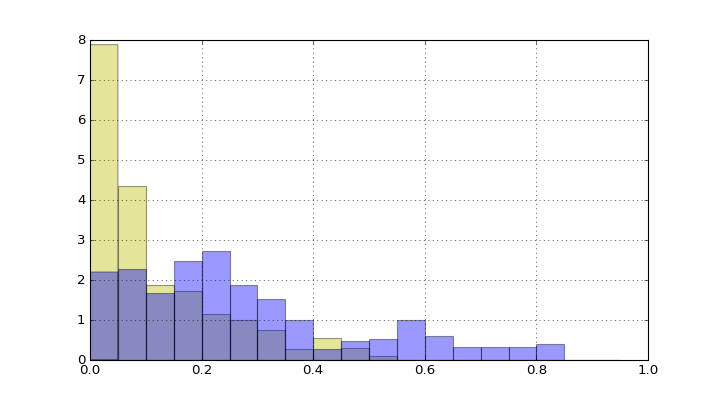

In [8]:
plt.figure(figsize=(9,5))

plt.hold(True)
pd.Series(e[pA]).hist(alpha=0.4,bins=np.arange(0,1,.05),color='y',normed=True)
pd.Series(e[pB]).hist(alpha=0.4,bins=np.arange(0,1,.05),color='b',normed=True)
plt.hold(False)

## Stage Frequency for Rainy Lake Levels

<IPython.core.display.Javascript object>


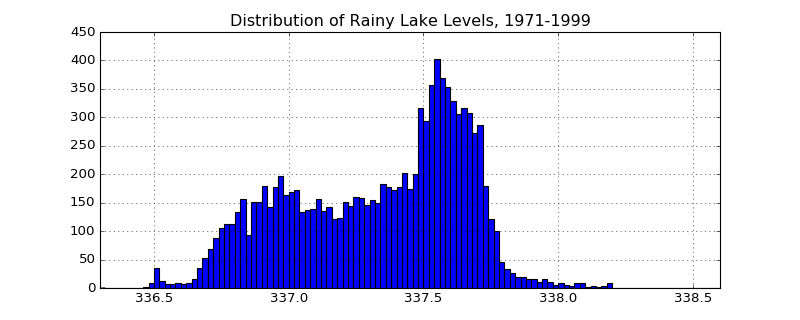

<IPython.core.display.Javascript object>


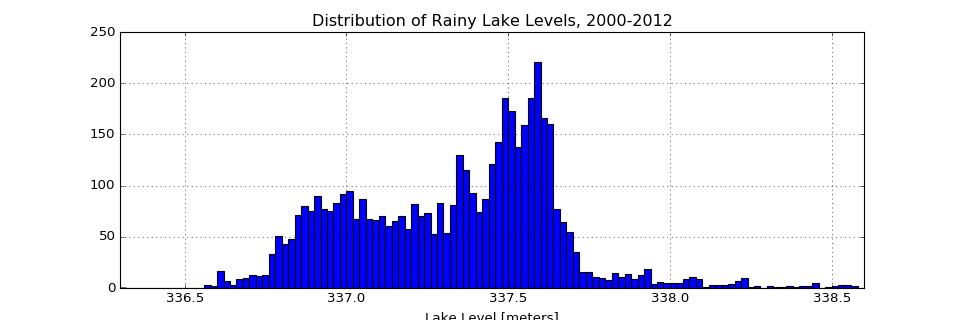

In [11]:
xlo = 336.3
xhi = 338.6
dx = 0.02

plt.figure(figsize=(10,4))
ts = RL['1971':'1999']
ts.hist(bins=np.arange(xlo,xhi+dx,dx))
ax = plt.axis()
plt.axis([xlo,xhi,ax[2],ax[3]])
plt.title('Distribution of Rainy Lake Levels, 1971-1999')

fname = img + 'RainyLakeLevelDistribution1970.png'

plt.savefig(fname)
!convert $fname -trim $fname
!convert $fname -transparent white $fname

plt.figure(figsize=(12,4))
ts = RL['2000':'2012']
ts.hist(bins=np.arange(xlo,xhi+dx,dx))
ax = plt.axis()
plt.axis([xlo,xhi,ax[2],ax[3]])
plt.xlabel('Lake Level [meters]')
plt.title('Distribution of Rainy Lake Levels, 2000-2012');

fname = img + 'RainyLakeLevelDistribution2000.png'

plt.savefig(fname)
!convert $fname -trim $fname


In [ ]:
plt.figure(figsize=(10,4))

plt.hold(True)
RL['1970':'1999'].hist(cumulative=True,
        bins=np.arange(xlo,xhi+dx,dx),
        alpha=0.4,
        color = 'b',
        normed=True)

RL['2000':'2012'].hist(cumulative=True,
        bins=np.arange(xlo,xhi+dx,dx),
        alpha=0.4,
        color = 'y',
        normed=True)

plt.axis([xlo,xhi,0,1.1])
plt.xlabel('Lake Level [meters]')

plt.legend(['1970-1999','2000-2012'],loc = 'upper left')
plt.title('Cumulative Distribution of Daily Levels for Rainy Lake');
plt.hold(False)

<IPython.core.display.Javascript object>


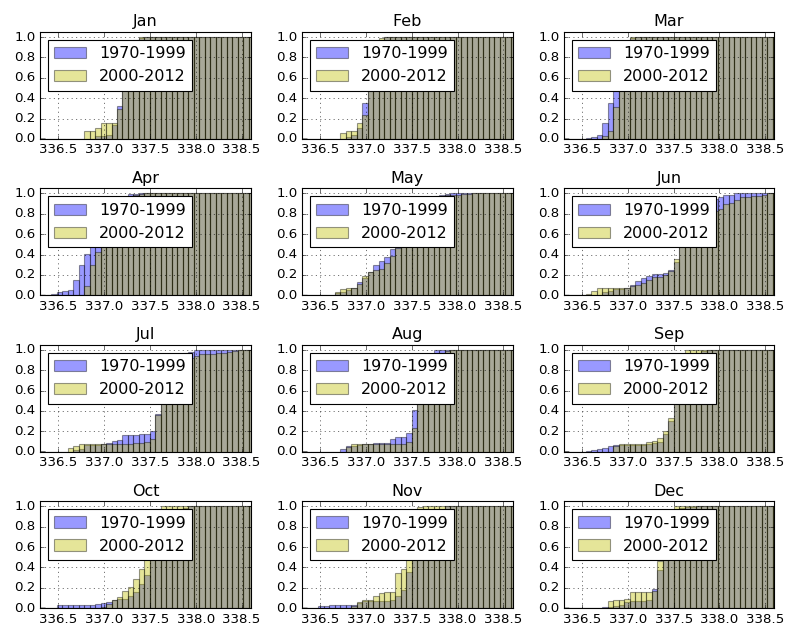

In [12]:
tsa = RL['1970':'1999']
tsb = RL['2000':'2012']
mostr = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(10,8))
for mo in range(1,13):
    plt.subplot(4,3,mo)
    plt.hold(True)
    tsa[tsa.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'b',
                                    alpha = 0.4)
    tsb[tsb.index.month == mo].hist(cumulative=True,
                                    normed=True,
                                    bins=np.arange(xlo,xhi+3*dx,3*dx),
                                    color = 'y',
                                    alpha = 0.4)
    plt.legend(['1970-1999','2000-2012'],loc='upper left')
    plt.axis([xlo,xhi,0,1.05])
    plt.title(mostr[mo-1])
    plt.hold(False)
    
plt.tight_layout()

<IPython.core.display.Javascript object>


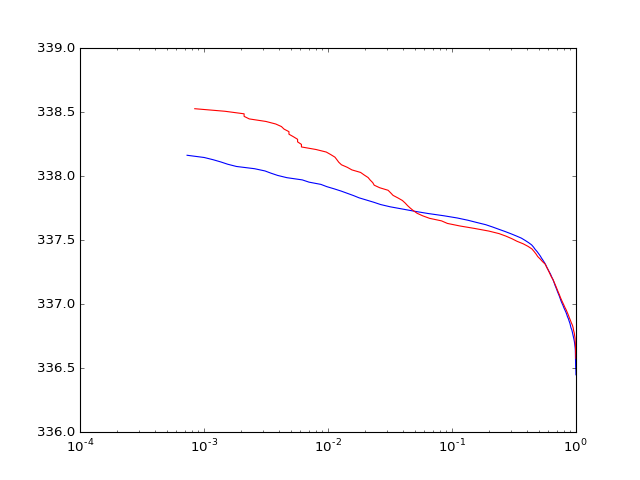

100

In [13]:
plt.figure()
plt.hold(True)

hist,bins = np.histogram([t for t in RL['1970':'1999'] if pd.notnull(t)],bins=100)
hist = np.cumsum(hist)
plt.semilogx([1-float(h)/hist.max()  for h in hist],bins[:-1],color='b')

hist,bins = np.histogram([t for t in RL['2000':'2012'] if pd.notnull(t)],bins=100)
hist = np.cumsum(hist)
plt.semilogx([1-float(h)/hist.max()  for h in hist],bins[:-1],color='r')

plt.hold(False)

bins.size
hist.size

## Rule Curve Performance 2000-2014

Load the rule curves from another notebook.

<IPython.core.display.Javascript object>


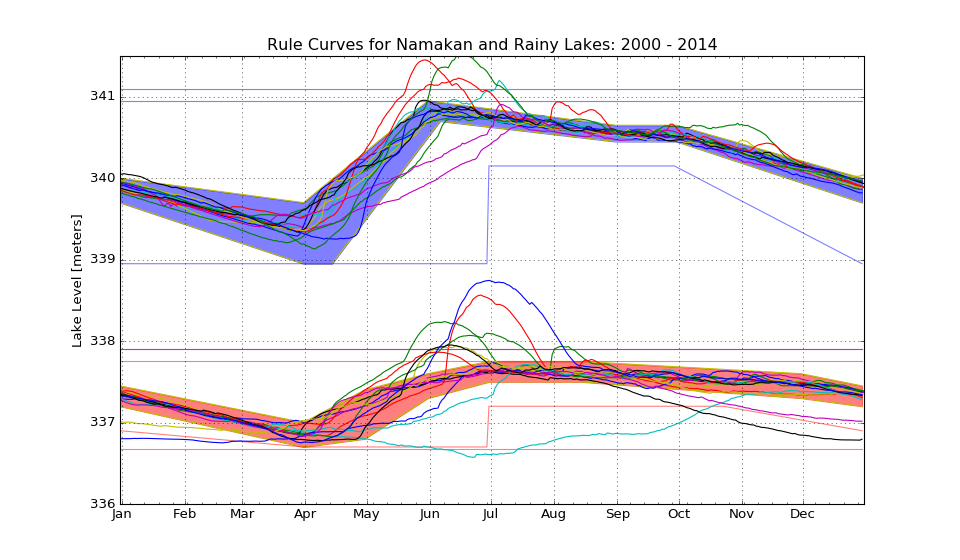

In [46]:
NL2000 = pd.read_pickle(dir+'NL2000.pkl')
RL2000 = pd.read_pickle(dir+'RL2000.pkl')

plt.figure(figsize=(12,7))
plt.hold(True)
NL2000['LRC'].plot(color='y')
NL2000['URC'].plot(color='y')

RL2000['LRC'].plot(color='y')
RL2000['URC'].plot(color='y')

NL2000['ELW'].plot(color='b',alpha=0.5)
NL2000['EDL'].plot(color='b',alpha=0.5)
NL2000['EHW'].plot(color='b',alpha=0.5)
NL2000['AGO'].plot(color='b',alpha=0.5)

RL2000['ELW'].plot(color='r',alpha=0.5)
RL2000['EDL'].plot(color='r',alpha=0.5)
RL2000['EHW'].plot(color='r',alpha=0.5)
RL2000['AGO'].plot(color='r',alpha=0.5)

plt.fill_between(NL2000.index,
                 NL2000['LRC'].tolist(),
                 NL2000['URC'].tolist(),
                 color='b', alpha='0.5')

plt.fill_between(RL2000.index,
                 RL2000['LRC'].tolist(),
                 RL2000['URC'].tolist(),
                 color='r', alpha='0.5')

plt.ylabel('Lake Level [meters]')
plt.title('Rule Curves for Namakan and Rainy Lakes: ' 
        + '2000 - ' + str(RL.dropna().index[-1].year))

e = pd.Series([])

for (yr,r) in RL['2000':].groupby(RL['2000':].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    e = e.append((r - RL2000['URC']).tshift(-shift.days))

for (yr,r) in NL['2000':].groupby(NL['2000':].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r.tshift(shift.days).plot()
    
plt.grid()
    
plt.hold(False)
plt.ylim(336,341.5)

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fname = img + 'RuleCurvePerformance2000-2014.png'

plt.savefig(fname)
!convert $fname -trim $fname